In [1]:
import os
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import datetime as dt
import json
import csv
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
ROOT = '/mnt/data0/lucy/manosphere/'
WORD_FILE = ROOT + 'data/ann_sig_entities.csv'
LOGS = ROOT + 'logs/'
TIME_SERIES_DIR = LOGS + 'time_series/'
PLOTS = LOGS + 'plots/'

# Time Series

This notebook visualizes time series for different words in our vocabulary of interest. 

The inputs to this notebook are mainly from `lexical_change.py`. 

In [3]:
def month_year_iter(start, end):
    '''
    https://stackoverflow.com/questions/5734438/how-to-create-a-month-iterator
    
    This function differs slightly from the one in lexical_change.py 
    because it converts the string to a datetime date. 
    '''
    start_contents = start.split('-')
    start_month = int(start_contents[1])
    start_year = int(start_contents[0])
    end_contents = end.split('-')
    end_month = int(end_contents[1])
    end_year = int(end_contents[0])
    ym_start= 12*start_year + start_month - 1
    ym_end= 12*end_year + end_month - 1
    for ym in range( ym_start, ym_end ):
        y, m = divmod( ym, 12 )
        month = str(m + 1)
        if len(month) == 1: 
            month = '0' + month
        str_month_year = str(y) + '-' + month
        yield dt.datetime.strptime(str_month_year,'%Y-%m').date()

def get_time_series_data(dataset): 
    '''
    Reads in a vocab file and a numpy matrix, where
    each row of the numpy matrix corresponds to the time series for a word.
    The order of rows and words in the vocab file match each other. 
    
    @inputs
    - dataset: str can be either 'manosphere' or 'control'
    '''
    word_list = []
            
    with open(TIME_SERIES_DIR + 'vocab_' + dataset + '_set.txt', 'r') as infile: 
        for line in infile: 
            word_list.append(line.strip())
    matrix = np.load(TIME_SERIES_DIR + 'time_series_' + dataset + '_smoothed_set.npy')
    
    time_series_dict = {}
    for i, word in enumerate(word_list): 
        time_series_dict[word] = matrix[i]
    
    min_month = '2005-11'
    max_month = '2019-12'
    months = list(month_year_iter(min_month, max_month))
    
    return time_series_dict, months

/mnt/data0/lucy/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


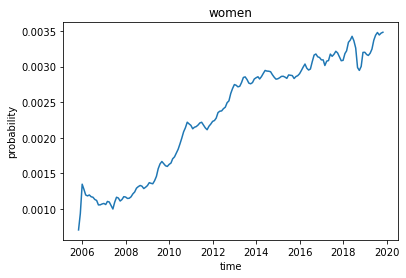

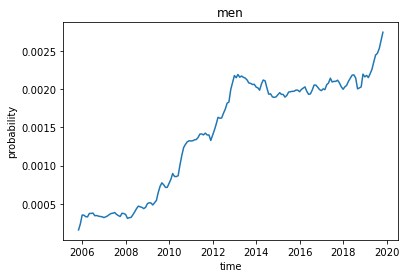

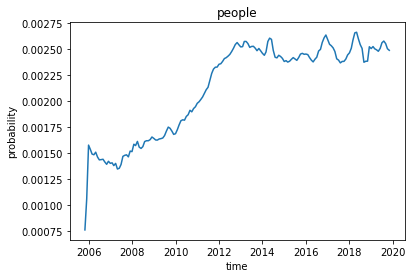

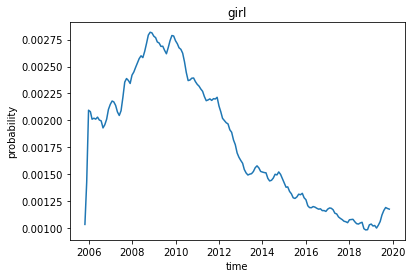

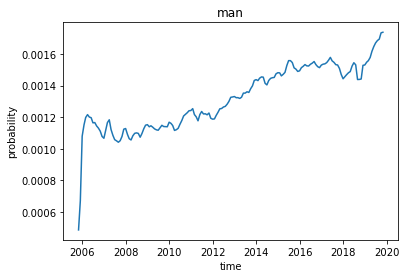

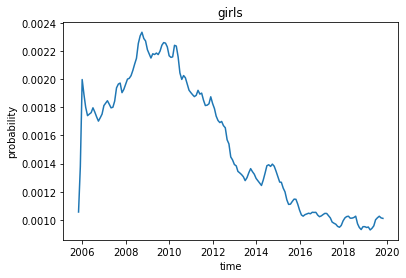

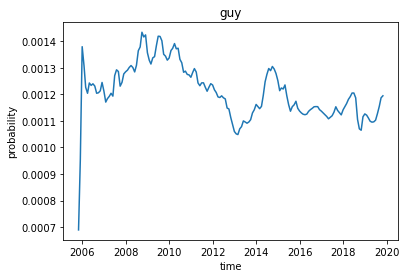

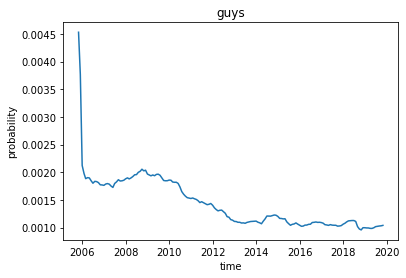

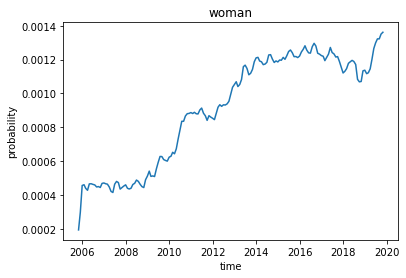

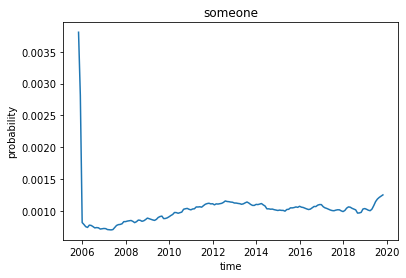

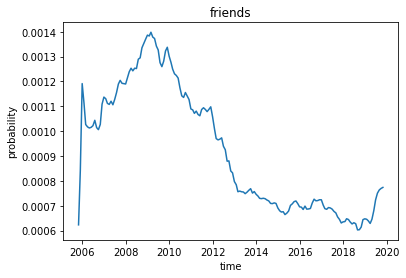

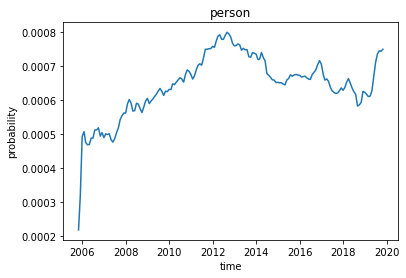

In [5]:
time_series_dict, months = get_time_series_data('manosphere')
for i, word in enumerate(time_series_dict): 
    sns.lineplot(x = months, y = time_series_dict[word])
    plt.title(word)
    plt.ylabel("probability")
    plt.xlabel("time")
    plt.savefig(PLOTS + word + '_manosphere.png')
    plt.show()
    if i > 10: break

mras 2013-03-01


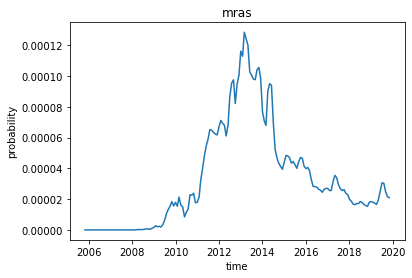

puas 2006-03-01


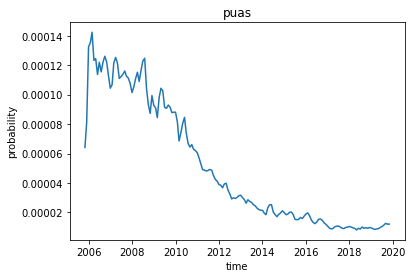

mgtows 2017-06-01


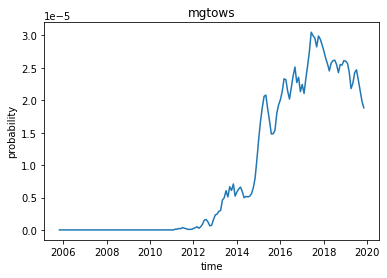

trpers 2014-07-01


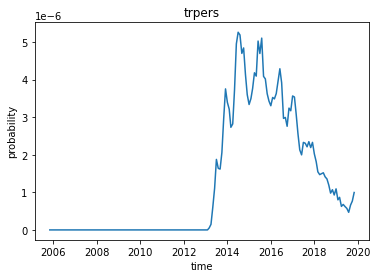

incels 2018-05-01


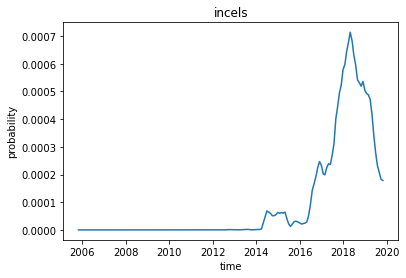

In [8]:
community_terms = ['incels', 'mgtows', 'puas', 'trpers', 'mras']
for i, word in enumerate(time_series_dict): 
    if word not in community_terms: continue
    max_idx = np.argmax(time_series_dict[word])
    print(word, months[max_idx])
    sns.lineplot(x = months, y = time_series_dict[word])
    plt.title(word)
    plt.ylabel("probability")
    plt.xlabel("time")
    plt.savefig(PLOTS + word + '_manosphere.png')
    plt.show()

## Investigate time series patterns

In [12]:
# load membership, time series, vocab
word_list = []
with open(TIME_SERIES_DIR + 'vocab_manosphere_set.txt', 'r') as infile: 
        for line in infile: 
            word_list.append(line.strip())
matrix = np.load(TIME_SERIES_DIR + 'time_series_manosphere_smoothed_set.npy')

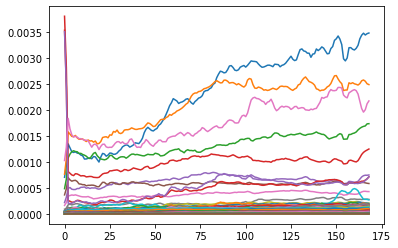

['women', 'people', 'man', 'someone', 'person', 'everyone', 'others', 'bitch', 'parents', 'bro', 'kid', 'boys', 'boy', 'nobody', 'mom', 'dad', 'baby', 'brother', 'dudes', 'son', 'asshole', 'slut', 'idiot', 'team', 'students', 'loser', 'doctor', 'lady', 'teacher', 'boss', 'brothers', 'teachers', 'king', 'folks', 'couples', 'daddy', 'losers', 'creep', 'sir', 'audience', 'mod', 'hero', 'manager', 'driver', 'cop', 'staff', 'princess', 'professor', 'lord', 'queen', 'owner', 'genius', 'patient', 'bros', 'host', 'writer', 'uncle', 'dumbass', 'celebrity', 'gentlemen', 'lesbians', 'liar', 'mum', 'clown', 'clients', 'actor', 'winner', 'devil', 'fans', 'coworker', 'gods', 'actors', 'prince', 'nerds', 'client', 'motherfucker', 'fucker', 'nurse', 'gamer', 'celebrities', 'acquaintances', 'readers', 'alcoholic', 'reader', 'fiance', 'colleagues', 'psychologist', 'exes', 'director', 'neighbor', 'cousins', 'grandma', 'grandmother', 'speaker', 'athlete', 'sucker', 'scientist', 'professionals', 'admin', '

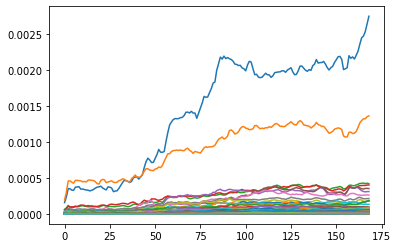

['men', 'woman', 'kids', 'family', 'children', 'wife', 'op', 'mother', 'father', 'males', 'husband', 'police', 'partner', 'population', 'bitches', 'humans', 'daughter', 'adult', 'partners', 'mothers', 'sluts', 'wives', 'babies', 'minority', 'cops', 'families', 'user', 'idiots', 'blacks', 'assholes', 'adults', 'president', 'enemy', 'husbands', 'provider', 'doctors', 'therapist', 'asians', 'teen', 'sons', 'moms', 'captain', 'teens', 'politicians', 'leaders', 'daughters', 'prostitutes', 'moron', 'peers', 'lawyers', 'employees', 'officer', 'household', 'offspring', 'teenager', 'liberals', 'coworkers', 'judges', 'citizens', 'criminals', 'attorney', 'soldiers', 'engineer', 'gays', 'employee', 'pussies', 'enemies', 'minorities', 'tribe', 'ceo', 'christians', 'scientists', 'teenagers', 'mommy', 'conservatives', 'employer', 'introvert', 'officers', 'masses', 'owners', 'athletes', 'citizen', 'democrats', 'relatives', 'millionaire', 'pedophile', 'europeans', 'supporters', 'republicans', 'soldier'

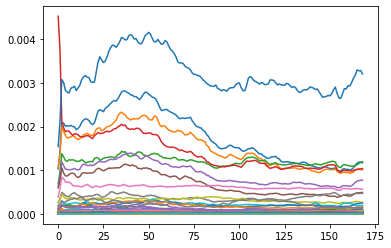

['girl', 'girls', 'guy', 'guys', 'friends', 'friend', 'anyone', 'dude', 'group', 'girlfriend', 'ex', 'boyfriend', 'mate', 'sister', 'buddy', 'somebody', 'everybody', 'anybody', 'ladies', 'player', 'girlfriends', 'master', 'strangers', 'leader', 'crowd', 'jerk', 'stranger', 'fool', 'boyfriends', 'cousin', 'nerd', 'expert', 'roommate', 'peoples', 'sisters', 'customers', 'customer', 'coach', 'lover', 'douche', 'gentleman', 'crew', 'artists', 'freshman', 'experts', 'beginner', 'chief', 'roommates', 'fools', 'douchebag', 'weirdo', 'guest', 'gal', 'prick', 'trainer', 'lovers', 'mentor', 'noone', 'angel', 'pal', 'cashier', 'comedian', 'jerks', 'bum', 'gambler', 'musician', 'milf', 'moderator', 'singer', 'blondes', 'beginners', 'coaches', 'lads', 'gals', 'stud', 'sweetheart', 'salesman', 'sis', 'jackass', 'pervert', 'bloke', 'champ', 'singles', 'sweetie', 'photographer', 'waiter', 'cutie', 'ninja', 'chef', 'crowds', 'twins', 'listener', 'sophomore', 'creeper', 'joker', 'dickhead', 'keeper', 's

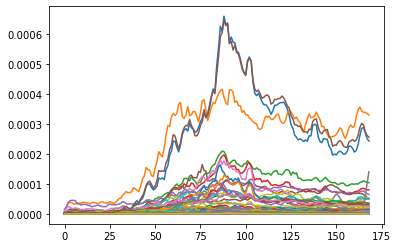

['feminists', 'child', 'victim', 'victims', 'individual', 'troll', 'mra', 'parent', 'lawyer', 'fathers', 'mrm', 'mras', 'individuals', 'rapist', 'rapists', 'americans', 'author', 'trolls', 'misogynist', 'spouse', 'atheist', 'dads', 'infant', 'activists', 'accuser', 'foreigners', 'jury', 'haters', 'tourists', 'writers', 'abusers', 'locals', 'perpetrators', 'misogynists', 'abuser', 'researchers', 'authors', 'congress', 'foreigner', 'pedophiles', 'opponent', 'gamers', 'accusers', 'atheists', 'bigot', 'russians', 'perpetrator', 'subscribers', 'infants', 'extremists', 'opponents', 'redditors', 'prisoners', 'scumbag', 'broads', 'redditor', 'homosexuals', 'academics', 'bigots', 'prosecutor', 'survivors', 'minors', 'defendant', 'commenters', 'aggressor', 'latinas', 'spouses', 'editor', 'attacker', 'douchebags', 'introverts', 'newborn', 'prosecutors', 'oppressors', 'radicals', 'crazies', 'inmates', 'faculty', 'libertarians', 'nanny', 'breadwinner', 'canadians', 'applicants', 'blogger', 'hipster

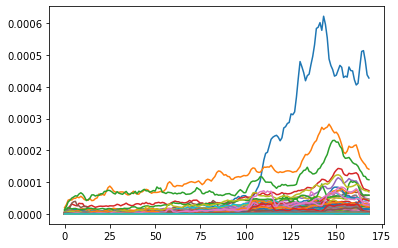

['mgtow', 'females', 'virgin', 'whore', 'whores', 'mods', 'jews', 'whites', 'slave', 'users', 'virgins', 'retard', 'muslims', 'monk', 'slaves', 'prostitute', 'escort', 'orbiter', 'bully', 'hookers', 'escorts', 'indians', 'mgtows', 'hooker', 'followers', 'nazis', 'jew', 'bullies', 'morons', 'ancestors', 'tranny', 'fuckers', 'leftists', 'billionaire', 'thug', 'psychopath', 'terrorists', 'commenter', 'pedo', 'therapists', 'narcissist', 'shooter', 'psychopaths', 'boomers', 'hypocrites', 'wizard', 'millennials', 'communists', 'lurkers', 'narcissists', 'tradcons', 'monks', 'dipshit', 'hermit', 'emperor', 'globalists', 'prophet', 'billionaires', 'rappers', 'creators', 'traitor', 'fuckboy', 'nationalists', 'savior', 'pedos', 'vegans', 'peasants', 'youtubers', 'dems', 'beggars', 'invaders', 'kv', 'fascists', 'traitors', 'fatass', 'millenials', 'witches', 'brethren', 'imbecile', 'outcasts', 'savages', 'electrician', 'amish', 'dumbasses', 'lefties', 'goddesses', 'grandkids', 'cuckolds', 'whitey',

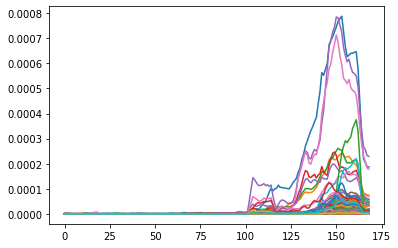

['chad', 'cuck', 'chads', 'normies', 'normie', 'stacy', 'simp', 'simps', 'tyrone', 'nigga', 'thots', 'boyo', 'stacies', 'ethnics', 'truecel', 'chadlite', 'femcel', 'landwhale', 'curries', 'cucktears', 'gangbanger', 'subhumans', 'autist', 'trannies', 'soyboy', 'npc', 'stacey', 'becky', 'degenerates', 'moids', 'boyos', 'norman', 'antifa', 'gigachad', 'soyboys', 'niggas', 'sexbots', 'normans', 'autists', 'janitor', 'chadlites', 'numales', 'tyrones', 'chang', 'niceguys', 'stacys', 'wymyn', 'oldcel', 'npcs', 'gymcels', 'wahmen', 'khhv', 'sexbot', 'neets', 'libtards', 'tradcucks', 'larper', 'noodlewhores', 'larpers', 'staceys', 'tradcuck', 'uggo', 'jockcel', 'oldcels', 'khv', 'tallfag', 'slav', 'stacie', 'pajeet', 'weebs', 'noodlewhore', 'chadpreet', 'youngcels', 'aryans', 'ethnicels', 'spergs', 'pakis', 'gigachads', 'infiltrator', 'hikikomori', 'femails', 'wamen', 'beckies', 'whamen', 'poorcel', 'brigaders', 'rapefugees', 'dickcel', 'escortcels', 'edgelord', 'infiltrators', 'wahmyn', 'bucko

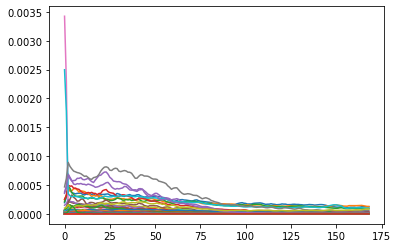

['chick', 'community', 'chicks', 'target', 'afc', 'hb8', 'players', 'band', 'hb9', 'hb7', 'buddies', 'artist', 'mates', 'puas', 'amog', 'newbie', 'targets', 'eachother', 'masters', 'wingman', 'bartender', 'stripper', 'strippers', 'hb10', 'babe', 'hb6', 'chump', 'doc', 'dj', 'fellas', 'waitress', 'instructor', 'hbs', 'pimp', 'dancer', 'instructors', 'hotties', 'newbies', 'geek', 'rockstar', 'hottie', 'stalker', 'caveman', 'bouncer', 'naturals', 'noob', 'messenger', 'guru', 'afcs', 'bartenders', 'protector', 'dork', 'brat', 'chode', 'babes', 'jedi', 'gurus', 'buyer', 'bouncers', 'buyers', 'waitresses', 'hb5', 'chumps', 'dancers', 'wingmen', 'fella', 'everyones', 'amogs', 'badboy', 'chic', 'geeks', 'mpua', 'wuss', 'buds', 'nun', 'promoter', 'pals', 'casanova', 'roomate', 'magician', 'newb', 'celeb', 'amigo', 'noobs', 'talker', 'rockstars', 'stylist', 'hostess', 'manipulator', 'seducer', 'entourage', 'swingers', 'chics', 'superstar', 'pirates', 'designers', 'entertainer', 'jester', 'housem

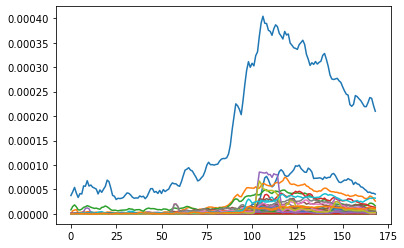

['sjw', 'betas', 'alphas', 'sjws', 'slayer', 'immigrants', 'manginas', 'arabs', 'refugees', 'jb', 'elites', 'fas', 'warriors', 'journalists', 'niggers', 'slayers', 'progressives', 'migrants', 'shitlord', 'redpillers', 'marxists', 'surgeons', 'jbs', 'sahm', 'widows', 'mghow', 'vikings', 'bluepillers', 'sloots', 'omegas', 'illegals', 'redpiller', 'trpers', 'sloot', 'barbarians', 'hackers', 'captains', 'rpers', 'oligarchs', 'mps', 'shitlords', 'saudis', 'islamists', 'ethniks', 'pakistanis', 'ashkenazi', 'sigmas', 'nominee', 'spinsters', 'wasps', 'nordics', 'schlub', 'serfs', 'stoics', 'infidels', 'neurotypicals', 'hubs', 'concubines', 'weemins', 'bluepiller', 'kurds', 'coders', 'sluthaters', 'revolutionaries', 'negroes', 'syrians', 'hostages', 'jailbaits', 'trps', 'trper', 'endocrinologist', 'gammas', 'freemasons', 'infidel', 'masons', 'anglos', 'laydeez', 'jihadists', 'authoritarians', 'successor', 'orthodontist', 'meninist', 'neocons', 'rvfers', 'shitposter', 'widower', 'wenches', 'slut

In [7]:
k = 8
mem = np.load(TIME_SERIES_DIR + 'clusters_set_' + str(k) + '.npy')
# get cluster num to set of words
clusters = defaultdict(list)
for i in range(len(mem)): 
    clusters[mem[i]].append(i)
# for each cluster, print words and plot their plots
for clust in clusters: 
    clust_words = []
    for idx in clusters[clust]: 
        clust_words.append(word_list[idx])
        plt.plot(matrix[idx])
    plt.show()
    print(clust_words)

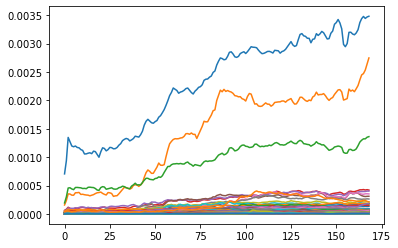

['women', 'men', 'woman', 'kids', 'family', 'children', 'wife', 'op', 'mother', 'father', 'males', 'nobody', 'husband', 'dad', 'partner', 'population', 'bitches', 'humans', 'daughter', 'adult', 'partners', 'mothers', 'sluts', 'wives', 'babies', 'minority', 'cops', 'families', 'user', 'betas', 'idiots', 'blacks', 'couples', 'assholes', 'adults', 'president', 'daddy', 'losers', 'enemy', 'husbands', 'provider', 'doctors', 'therapist', 'asians', 'alphas', 'mod', 'teen', 'sons', 'moms', 'captain', 'teens', 'politicians', 'leaders', 'daughters', 'prostitutes', 'moron', 'professor', 'peers', 'lawyers', 'employees', 'lord', 'officer', 'household', 'offspring', 'teenager', 'coworkers', 'citizens', 'slayer', 'criminals', 'soldiers', 'immigrants', 'engineer', 'gays', 'employee', 'pussies', 'enemies', 'minorities', 'tribe', 'ceo', 'christians', 'fans', 'coworker', 'scientists', 'teenagers', 'mommy', 'conservatives', 'employer', 'introvert', 'officers', 'masses', 'motherfucker', 'owners', 'athletes

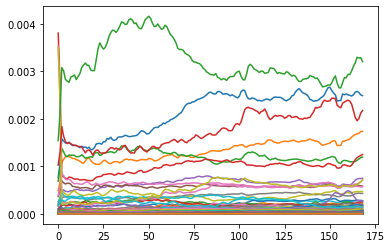

['people', 'man', 'guy', 'someone', 'person', 'everyone', 'anyone', 'others', 'dude', 'group', 'bitch', 'parents', 'girlfriend', 'ex', 'bro', 'kid', 'boys', 'boy', 'mom', 'baby', 'brother', 'dudes', 'son', 'asshole', 'slut', 'sister', 'idiot', 'somebody', 'everybody', 'team', 'students', 'loser', 'doctor', 'anybody', 'lady', 'ladies', 'teacher', 'boss', 'girlfriends', 'strangers', 'brothers', 'king', 'folks', 'jerk', 'stranger', 'fool', 'creep', 'sir', 'boyfriends', 'audience', 'hero', 'cousin', 'nerd', 'manager', 'driver', 'cop', 'staff', 'expert', 'princess', 'peoples', 'sisters', 'queen', 'owner', 'genius', 'patient', 'bros', 'customers', 'host', 'writer', 'customer', 'uncle', 'coach', 'dumbass', 'douche', 'celebrity', 'gentlemen', 'lesbians', 'liar', 'mum', 'clown', 'clients', 'gentleman', 'actor', 'crew', 'winner', 'devil', 'gods', 'actors', 'prince', 'nerds', 'client', 'fucker', 'nurse', 'gamer', 'celebrities', 'acquaintances', 'alcoholic', 'reader', 'experts', 'fiance', 'chief',

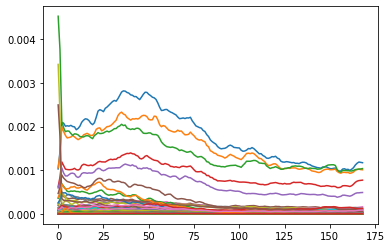

['girl', 'girls', 'guys', 'friends', 'friend', 'chick', 'boyfriend', 'community', 'chicks', 'mate', 'target', 'buddy', 'afc', 'player', 'master', 'hb8', 'leader', 'crowd', 'players', 'band', 'hb9', 'hb7', 'buddies', 'artist', 'mates', 'puas', 'roommate', 'amog', 'newbie', 'targets', 'lover', 'eachother', 'masters', 'wingman', 'bartender', 'stripper', 'artists', 'strippers', 'hb10', 'babe', 'hb6', 'freshman', 'chump', 'beginner', 'doc', 'dj', 'fellas', 'waitress', 'instructor', 'hbs', 'pimp', 'guest', 'prick', 'dancer', 'instructors', 'hotties', 'newbies', 'noone', 'angel', 'geek', 'comedian', 'rockstar', 'hottie', 'bum', 'stalker', 'gambler', 'caveman', 'musician', 'milf', 'bouncer', 'naturals', 'singer', 'blondes', 'beginners', 'noob', 'lads', 'messenger', 'gals', 'guru', 'afcs', 'bartenders', 'sis', 'jackass', 'protector', 'dork', 'champ', 'waiter', 'cutie', 'ninja', 'brat', 'chode', 'babes', 'twins', 'jedi', 'gurus', 'buyer', 'bouncers', 'buyers', 'waitresses', 'hb5', 'creeper', 'jo

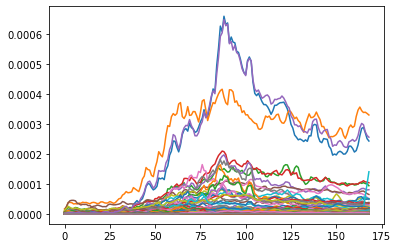

['feminists', 'child', 'police', 'victim', 'victims', 'individual', 'troll', 'mra', 'parent', 'lawyer', 'fathers', 'mrm', 'mras', 'individuals', 'rapist', 'teachers', 'rapists', 'americans', 'author', 'trolls', 'misogynist', 'judges', 'spouse', 'attorney', 'atheist', 'dads', 'infant', 'activists', 'accuser', 'foreigners', 'jury', 'haters', 'readers', 'tourists', 'writers', 'abusers', 'locals', 'perpetrators', 'misogynists', 'abuser', 'researchers', 'authors', 'congress', 'foreigner', 'pedophiles', 'opponent', 'gamers', 'accusers', 'atheists', 'bigot', 'russians', 'perpetrator', 'participants', 'subscribers', 'infants', 'extremists', 'opponents', 'redditors', 'prisoners', 'scumbag', 'broads', 'counselor', 'redditor', 'homosexuals', 'academics', 'bigots', 'prosecutor', 'survivors', 'minors', 'defendant', 'commenters', 'aggressor', 'latinas', 'spouses', 'editor', 'attacker', 'douchebags', 'introverts', 'newborn', 'prosecutors', 'oppressors', 'radicals', 'crazies', 'inmates', 'faculty', 'l

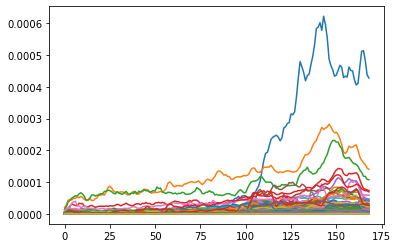

['mgtow', 'females', 'virgin', 'whore', 'whores', 'sjw', 'mods', 'jews', 'whites', 'slave', 'users', 'virgins', 'retard', 'muslims', 'monk', 'slaves', 'sjws', 'prostitute', 'escort', 'orbiter', 'bully', 'liberals', 'hookers', 'escorts', 'indians', 'mgtows', 'hooker', 'followers', 'nazis', 'jew', 'bullies', 'morons', 'ancestors', 'tranny', 'fuckers', 'leftists', 'billionaire', 'arabs', 'thug', 'psychopath', 'terrorists', 'commenter', 'pedo', 'therapists', 'refugees', 'jb', 'narcissist', 'elites', 'shooter', 'psychopaths', 'hypocrites', 'wizard', 'niggers', 'millennials', 'communists', 'migrants', 'lurkers', 'narcissists', 'tradcons', 'monks', 'socialists', 'dipshit', 'hermit', 'emperor', 'globalists', 'prophet', 'billionaires', 'rappers', 'creators', 'jbs', 'traitor', 'fuckboy', 'sahm', 'nationalists', 'savior', 'pedos', 'vegans', 'peasants', 'youtubers', 'capitalists', 'dems', 'beggars', 'invaders', 'kv', 'fascists', 'traitors', 'fatass', 'millenials', 'witches', 'brethren', 'imbecile'

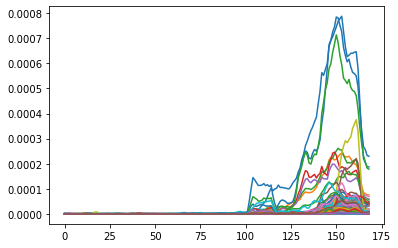

['chad', 'cuck', 'chads', 'normies', 'normie', 'stacy', 'simp', 'simps', 'tyrone', 'nigga', 'thots', 'boyo', 'stacies', 'ethnics', 'truecel', 'chadlite', 'femcel', 'landwhale', 'curries', 'cucktears', 'gangbanger', 'subhumans', 'autist', 'trannies', 'boomers', 'soyboy', 'npc', 'stacey', 'becky', 'degenerates', 'moids', 'boyos', 'norman', 'antifa', 'gigachad', 'soyboys', 'niggas', 'sexbots', 'normans', 'autists', 'janitor', 'chadlites', 'numales', 'tyrones', 'chang', 'niceguys', 'stacys', 'wymyn', 'oldcel', 'npcs', 'gymcels', 'wahmen', 'khhv', 'sexbot', 'neets', 'libtards', 'tradcucks', 'larper', 'noodlewhores', 'larpers', 'commies', 'staceys', 'tradcuck', 'uggo', 'jockcel', 'oldcels', 'khv', 'tallfag', 'slav', 'stacie', 'pajeet', 'weebs', 'noodlewhore', 'chadpreet', 'youngcels', 'aryans', 'ethnicels', 'spergs', 'fhos', 'pakis', 'gigachads', 'infiltrator', 'hikikomori', 'femails', 'wamen', 'beckies', 'whamen', 'poorcel', 'brigaders', 'rapefugees', 'dickcel', 'escortcels', 'edgelord', 'i

In [34]:
k = 6
mem = np.load(TIME_SERIES_DIR + 'clusters_set_' + str(k) + '.npy')
# get cluster num to set of words
clusters = defaultdict(list)
for i in range(len(mem)): 
    clusters[mem[i]].append(i)
# for each cluster, print words and plot their plots
for clust in clusters: 
    clust_words = []
    for idx in clusters[clust]: 
        clust_words.append(word_list[idx])
        plt.plot(matrix[idx])
    plt.show()
    print(clust_words)

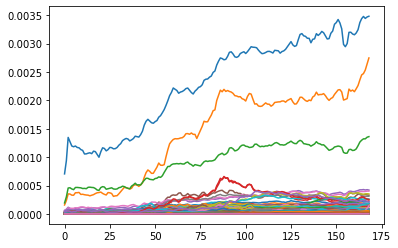

['women', 'men', 'woman', 'feminists', 'kids', 'child', 'family', 'children', 'wife', 'op', 'mother', 'father', 'females', 'males', 'nobody', 'husband', 'police', 'dad', 'victim', 'partner', 'victims', 'population', 'bitches', 'individual', 'humans', 'troll', 'daughter', 'adult', 'mra', 'partners', 'mothers', 'parent', 'lawyer', 'fathers', 'sluts', 'wives', 'mrm', 'babies', 'mras', 'minority', 'cops', 'families', 'individuals', 'mods', 'rapist', 'user', 'betas', 'idiots', 'teachers', 'slave', 'rapists', 'users', 'americans', 'blacks', 'assholes', 'adults', 'president', 'losers', 'enemy', 'husbands', 'provider', 'doctors', 'muslims', 'therapist', 'asians', 'alphas', 'trolls', 'slaves', 'teen', 'misogynist', 'sons', 'moms', 'captain', 'teens', 'politicians', 'leaders', 'daughters', 'prostitutes', 'moron', 'sjws', 'peers', 'lawyers', 'prostitute', 'employees', 'lord', 'officer', 'household', 'offspring', 'escort', 'orbiter', 'teenager', 'liberals', 'hookers', 'coworkers', 'judges', 'india

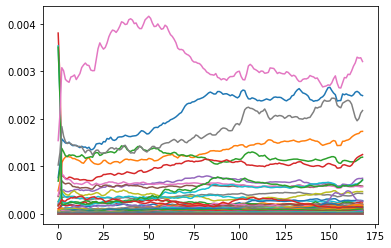

['people', 'man', 'guy', 'someone', 'person', 'everyone', 'anyone', 'others', 'dude', 'group', 'bitch', 'parents', 'girlfriend', 'ex', 'bro', 'kid', 'boys', 'boy', 'mom', 'baby', 'virgin', 'brother', 'dudes', 'son', 'asshole', 'slut', 'idiot', 'somebody', 'everybody', 'team', 'students', 'loser', 'doctor', 'lady', 'teacher', 'boss', 'strangers', 'brothers', 'king', 'author', 'folks', 'couples', 'jerk', 'stranger', 'daddy', 'fool', 'creep', 'sir', 'audience', 'mod', 'hero', 'nerd', 'manager', 'driver', 'cop', 'staff', 'expert', 'princess', 'professor', 'peoples', 'sisters', 'queen', 'owner', 'genius', 'patient', 'bros', 'customers', 'host', 'writer', 'uncle', 'coach', 'dumbass', 'douche', 'celebrity', 'gentlemen', 'lesbians', 'liar', 'mum', 'clown', 'clients', 'gentleman', 'dads', 'actor', 'crew', 'winner', 'devil', 'fans', 'coworker', 'gods', 'actors', 'prince', 'nerds', 'client', 'foreigners', 'motherfucker', 'fucker', 'haters', 'nurse', 'gamer', 'celebrities', 'acquaintances', 'reade

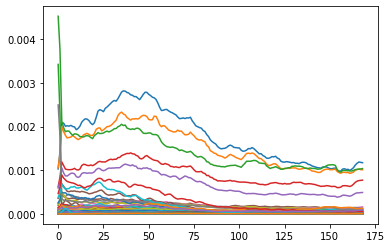

['girl', 'girls', 'guys', 'friends', 'friend', 'chick', 'boyfriend', 'community', 'chicks', 'mate', 'target', 'sister', 'buddy', 'anybody', 'ladies', 'afc', 'player', 'girlfriends', 'master', 'hb8', 'leader', 'crowd', 'players', 'band', 'hb9', 'hb7', 'boyfriends', 'buddies', 'artist', 'mates', 'cousin', 'puas', 'roommate', 'amog', 'customer', 'newbie', 'targets', 'lover', 'eachother', 'masters', 'wingman', 'bartender', 'stripper', 'artists', 'strippers', 'hb10', 'babe', 'hb6', 'freshman', 'chump', 'beginner', 'chief', 'doc', 'dj', 'fellas', 'fools', 'waitress', 'instructor', 'hbs', 'pimp', 'guest', 'prick', 'trainer', 'dancer', 'instructors', 'hotties', 'newbies', 'noone', 'angel', 'pal', 'geek', 'comedian', 'rockstar', 'hottie', 'bum', 'stalker', 'gambler', 'caveman', 'musician', 'milf', 'moderator', 'bouncer', 'naturals', 'singer', 'blondes', 'beginners', 'noob', 'lads', 'messenger', 'gals', 'guru', 'afcs', 'bartenders', 'sis', 'jackass', 'protector', 'dork', 'bloke', 'champ', 'photo

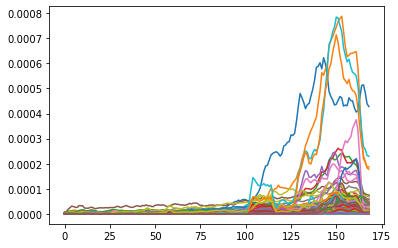

['mgtow', 'chad', 'cuck', 'chads', 'normies', 'whore', 'normie', 'whores', 'sjw', 'jews', 'whites', 'virgins', 'retard', 'stacy', 'monk', 'simp', 'bully', 'simps', 'escorts', 'tyrone', 'mgtows', 'nigga', 'thots', 'boyo', 'jew', 'bullies', 'stacies', 'ethnics', 'truecel', 'chadlite', 'femcel', 'tranny', 'landwhale', 'leftists', 'billionaire', 'curries', 'arabs', 'pedo', 'therapists', 'refugees', 'cucktears', 'gangbanger', 'shooter', 'subhumans', 'autist', 'trannies', 'boomers', 'soyboy', 'npc', 'stacey', 'becky', 'degenerates', 'millennials', 'moids', 'boyos', 'norman', 'migrants', 'antifa', 'lurkers', 'gigachad', 'soyboys', 'tradcons', 'niggas', 'monks', 'sexbots', 'normans', 'autists', 'janitor', 'chadlites', 'numales', 'globalists', 'prophet', 'tyrones', 'chang', 'niceguys', 'jbs', 'stacys', 'wymyn', 'oldcel', 'fuckboy', 'npcs', 'nationalists', 'pedos', 'vegans', 'youtubers', 'gymcels', 'dems', 'wahmen', 'invaders', 'kv', 'traitors', 'fatass', 'millenials', 'imbecile', 'outcasts', 'k

In [8]:
k = 4
mem = np.load(TIME_SERIES_DIR + 'clusters_set_' + str(k) + '.npy')
# get cluster num to set of words
clusters = defaultdict(list)
for i in range(len(mem)): 
    clusters[mem[i]].append(i)
# for each cluster, print words and plot their plots
for clust in clusters: 
    clust_words = []
    for idx in clusters[clust]: 
        clust_words.append(word_list[idx])
        plt.plot(matrix[idx])
    plt.show()
    print(clust_words)

### Building off of k = 6

This is the default $k$ in the original paper for k-spectral centroid clustering. 

In [36]:
with open(LOGS + 'gram_counts/combined_catyear_word_count.json', 'r') as infile: 
    catyear_word_count = json.load(infile)
with open(LOGS + 'coref_results/mano_gender_labels.json', 'r') as infile: 
    mano_gender_labels = json.load(infile)

In [37]:
total_vocab_count = Counter() # {term : count in mano reddit + forum}
for catyear in catyear_word_count: 
    for term in catyear_word_count[catyear]: 
        total_vocab_count[term] += catyear_word_count[catyear][term]
print(total_vocab_count.most_common(20))

[('she', 1760546), ('women', 1314942), ('people', 1092284), ('he', 861007), ('man', 829419), ('guys', 819044), ('girl', 789403), ('girls', 735912), ('men', 719274), ('guy', 684915), ('woman', 630001), ('someone', 545557), ('friends', 406592), ('anyone', 373798), ('friend', 338119), ('person', 332783), ('female', 295285), ('everyone', 287904), ('male', 248241), ('others', 217140)]


In [38]:
k = 6
min_month = '2005-11'
max_month = '2019-12'
months = list(month_year_iter(min_month, max_month))

In [39]:
mu = np.load(TIME_SERIES_DIR + 'mu_' + str(k) + '.npy')

In [40]:
mem = np.load(TIME_SERIES_DIR + 'clusters_set_' + str(k) + '.npy')
# get cluster num to set of words
clusters = defaultdict(list)
for i in range(len(mem)): 
    clusters[mem[i]].append(i)
# for each cluster, print words and plot their plots
six_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
clust_words = defaultdict(list)
titles = ['A', 'B', 'C', 'D', 'E', 'F']
years = [dt.datetime.strptime(str(y),'%Y').date() for y in [2006, 2010, 2015, 2019]]

In [41]:
clusters.keys()
cluster_order = [4, 3, 5, 1, 2, 0]

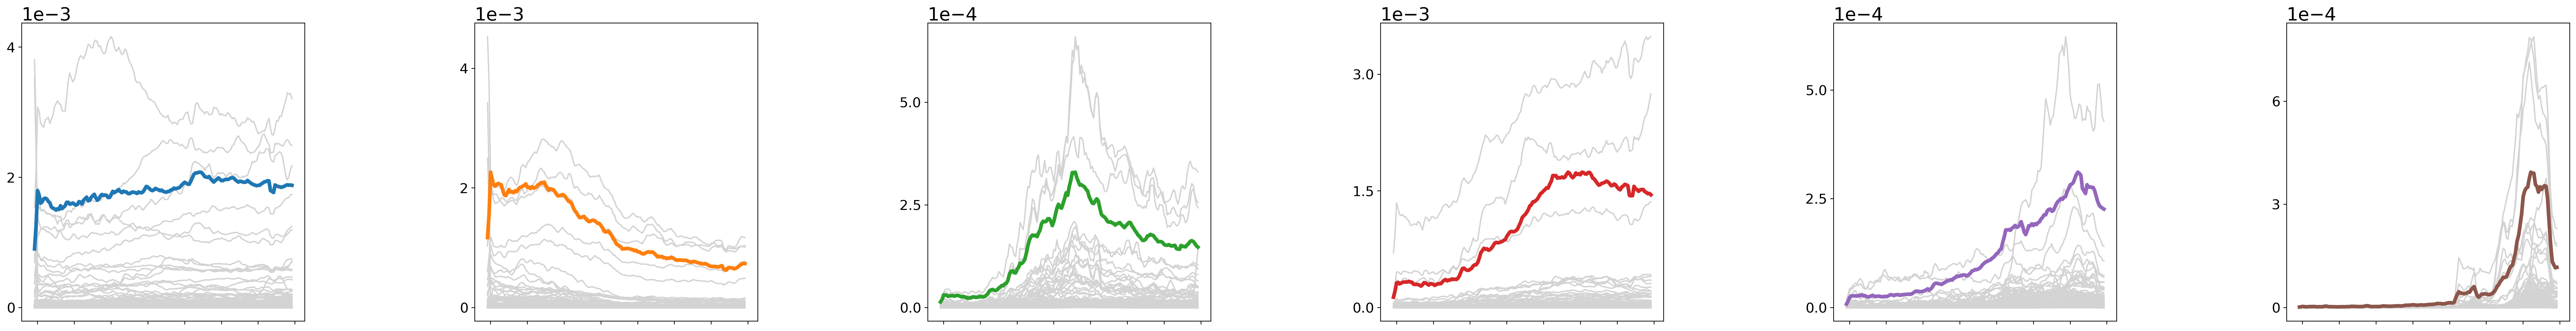

In [78]:
fig, axes = plt.subplots(1, 6, figsize=(50, 6), dpi=200)
for order, clust in enumerate(cluster_order): 
    max_height = 0
    for idx in clusters[clust]: 
        clust_words[clust].append(word_list[idx])
        #if word_list[idx] in mano_gender_labels and mano_gender_labels[word_list[idx]] > 0.75: 
        axes[order].plot(months, matrix[idx], c='lightgray')
        max_height = max(max(matrix[idx]), max_height)
    ratio = max(mu[clust]) / max_height
    axes[order].plot(months, mu[clust] / (ratio*2), linewidth=4, c=six_colors[order])
    axes[order].ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
    axes[order].yaxis.set_major_locator(mtick.MaxNLocator(3))
    axes[order].yaxis.set_tick_params(labelsize=15)
    axes[order].yaxis.get_offset_text().set_fontsize(20)
    #axes[order].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    #axes[order].xaxis.set_tick_params(labelsize=20)
    #axes[order].set_xticks(years)
    axes[order].set_xticklabels([])
    #axes[order].set_title(titles[order], fontsize=30, fontweight="bold")
plt.subplots_adjust(wspace=0.6, hspace=0)
plt.savefig(LOGS + "time_series.svg")
plt.show()

In [71]:
for order, clust in enumerate(cluster_order): 
    these_words = clust_words[clust]
    these_counts = Counter()
    for w in these_words: 
        these_counts[w] = total_vocab_count[w]
    print(clust)
    for tup in these_counts.most_common(100): 
        if tup[0] in mano_gender_labels: 
            gender = round(mano_gender_labels[tup[0]], 3)
        else: 
            gender = '-'
        if gender != '-' and gender > 0.75: 
            print(tup[0], gender)
    print(these_counts.most_common(30))
    print()

4
she 1
female 1
bitch 0.879
girlfriend 1
mom 0.965
slut 0.924
sister 1
other women 1
ladies 1
lady 1
girlfriends 1
many women 1
female friends 1
princess 1
more women 1
sisters 1
attractive women 1
queen 1
[('she', 1760546), ('people', 1092284), ('he', 861007), ('man', 829419), ('guy', 684915), ('someone', 545557), ('anyone', 373798), ('person', 332783), ('female', 295285), ('everyone', 287904), ('male', 248241), ('others', 217140), ('dude', 189837), ('bitch', 176292), ('group', 158457), ('parents', 131542), ('bro', 130575), ('girlfriend', 127424), ('alpha', 126208), ('ex', 118090), ('kid', 110696), ('boys', 85962), ('boy', 84202), ('mom', 78898), ('other people', 74840), ('most people', 73125), ('brother', 70321), ('someone else', 70210), ('dudes', 65044), ('slut', 58612)]

3
girl 1
girls 1
chick 1
chicks 1
gf 1
hb 0.924
other girls 1
one girl 1
hb8 0.939
hot girls 1
most girls 1
hb9 0.936
many girls 1
hot girl 1
hb7 0.928
other girl 1
two girls 1
eachother 0.758
stripper 0.958
beaut

In [30]:
with open(TIME_SERIES_DIR + 'cluster_members_' + str(k) + '.json', 'w') as outfile: 
    json.dump(clust_words, outfile)